In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
from matplotlib import style
import seaborn as sns

In [2]:
data = pd.read_csv("student-mat.csv", sep = ';')
# data acquired from UCI
# https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [3]:
## Data treatment


# school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
school = {'GP': 1,'MS': 2} 
data.school = [school[item] for item in data.school] 

# student's sex (binary: 'F' - female or 'M' - male) 
sex = {'M': 1,'F': 2} 
data.sex = [sex[item] for item in data.sex] 

# student's home address type (binary: 'U' - urban or 'R' - rural) 
address = {'U': 1,'R': 2} 
data.address = [address[item] for item in data.address] 

# family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
famsize = {'LE3': 1,'GT3': 2} 
data.famsize = [famsize[item] for item in data.famsize] 

# parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
Pstatus = {'T': 1,'A': 2} 
data.Pstatus = [Pstatus[item] for item in data.Pstatus] 

# Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'athome' or 'other')
Mjob = {'teacher': 1,'health': 2, 'services': 3, 'at_home': 4, 'other': 5} 
data.Mjob = [Mjob[item] for item in data.Mjob] 

# Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'athome' or 'other') 
Fjob = {'teacher': 1,'health': 2, 'services': 3, 'at_home': 4, 'other': 5} 
data.Fjob = [Fjob[item] for item in data.Fjob] 

# reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
reason = {'home': 1,'reputation': 2, 'course': 3, 'other': 4} 
data.reason = [reason[item] for item in data.reason] 

# guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
guardian = {'mother': 1,'father': 2, 'other': 3} 
data.guardian = [guardian[item] for item in data.guardian] 

# schoolsup - extra educational support (binary: yes or no) 
schoolsup = {'yes': 1,'no': 2} 
data.schoolsup = [schoolsup[item] for item in data.schoolsup] 

# famsup - family educational support (binary: yes or no) 
famsup = {'yes': 1,'no': 2} 
data.famsup = [famsup[item] for item in data.famsup] 

# paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
paid = {'yes': 1,'no': 2} 
data.paid = [paid[item] for item in data.paid] 

# activities - extra-curricular activities (binary: yes or no) 
activities = {'yes': 1,'no': 2} 
data.activities = [activities[item] for item in data.activities] 

# nursery - attended nursery school (binary: yes or no) 
nursery = {'yes': 1,'no': 2} 
data.nursery = [nursery[item] for item in data.nursery] 

# higher - wants to take higher education (binary: yes or no) 
higher = {'yes': 1,'no': 2} 
data.higher = [higher[item] for item in data.higher] 

# internet - Internet access at home (binary: yes or no) 
internet = {'yes': 1,'no': 2} 
data.internet = [internet[item] for item in data.internet] 

# romantic - with a romantic relationship (binary: yes or no)
romantic = {'yes': 1,'no': 2} 
data.romantic = [romantic[item] for item in data.romantic] 

print(data.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       1    2   18        1        2        2     4     4     4     1  ...   
1       1    2   17        1        2        1     1     1     4     5  ...   
2       1    2   15        1        1        1     1     1     4     5  ...   
3       1    2   15        1        2        1     4     2     2     3  ...   
4       1    2   16        1        2        1     3     3     5     5  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  

[5 rows x 33 columns]


In [4]:
predict = "G3"

X = np.array(data.drop([predict],1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

best = 0


'''
for i in range(300):

    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)

    accuracy = linear.score(x_test, y_test)

    print("Accuracy: ", accuracy)

    if accuracy > best:
        best = accuracy
        
        #save pickle file
        with open("StudentModel.pickle", 'wb') as f:
            pickle.dump(linear, f)'''

            
# print("Best accuracy: ", best)
            
pickle_in = open("StudentModel.pickle", "rb")
linear = pickle.load(pickle_in)

print("\nCoefficients: ", linear.coef_)
print("\nIntercept: ", linear.intercept_, "\n")

predictions = linear.predict(x_test)

for i in range(len(predictions)):
    print(predictions[i], y_test[i])



Coefficients:  [ 0.43187785 -0.2191828  -0.1853795  -0.01291673 -0.20132427  0.00276981
  0.1632205  -0.13663435  0.05416232  0.01497939  0.12130147 -0.13665494
  0.09375559 -0.10680771 -0.13581383 -0.56215135 -0.20206613 -0.20265745
  0.3757551   0.14863244 -0.16820388  0.21937923  0.31126759  0.36186276
  0.07569276  0.04706335 -0.20146845  0.15046711  0.06162743  0.05166382
  0.20014793  0.96611314]

Intercept:  -1.2064200982013986 

5.0943842373383985 5
11.985374554103801 13
11.844543607471069 13
16.58862341327106 15
7.572801585436672 9
9.378075044162827 11
13.58968477494371 12
1.8872908473638734 0
15.550761633330083 16
14.367605480133744 15
13.789087299353216 14
14.102290640335266 15
9.72944196277263 9
13.432253113733994 14
8.055110590319718 11
13.069024845355296 13
5.622133083971285 0
12.511207105557986 14
16.943127633535735 16
6.293862036530307 0
-1.7250263186346995 0
12.944134333547789 11
14.763794274638986 15
7.87595613821777 10
15.158085873318345 16
12.4542488709294 12
11.67

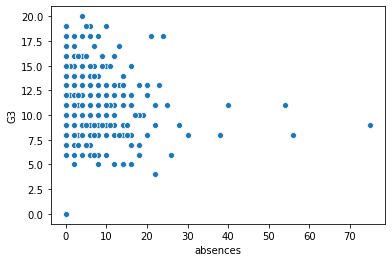

In [5]:
p = 'absences'

sns.scatterplot(x = p, y = "G3", data=data)
sns.set(style='darkgrid',)
plt.show()